# Gradient descent multi-class handwritten digit classifier - No ML framework

## Objective

This notebook demonstrates how to build a multi-class handwritten digit classifier for the MNIST dataset using gradient descent, without relying on any machine learning frameworks. The goal is to accurately predict digits from 0 to 9 by implementing all necessary components from scratch.


## Implementation

### Imports

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from os.path import join
import random

import matplotlib.pyplot as plt

from model_functions import *
from mnist_dataloader import MnistDataloader, show_images

### Loading the dataset

In [2]:
# Set file paths based on added MNIST Datasets.
input_path = '/home/alex/Documents/handwritten_recognition_noframework/data/mnist_dataset'
training_images_filepath = join(input_path, 'train-images-idx3-ubyte/train-images-idx3-ubyte')
training_labels_filepath = join(input_path, 'train-labels-idx1-ubyte/train-labels-idx1-ubyte')
test_images_filepath = join(input_path, 't10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
test_labels_filepath = join(input_path, 't10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')

# Load MNIST dataset.
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

### Visualizing the dataset

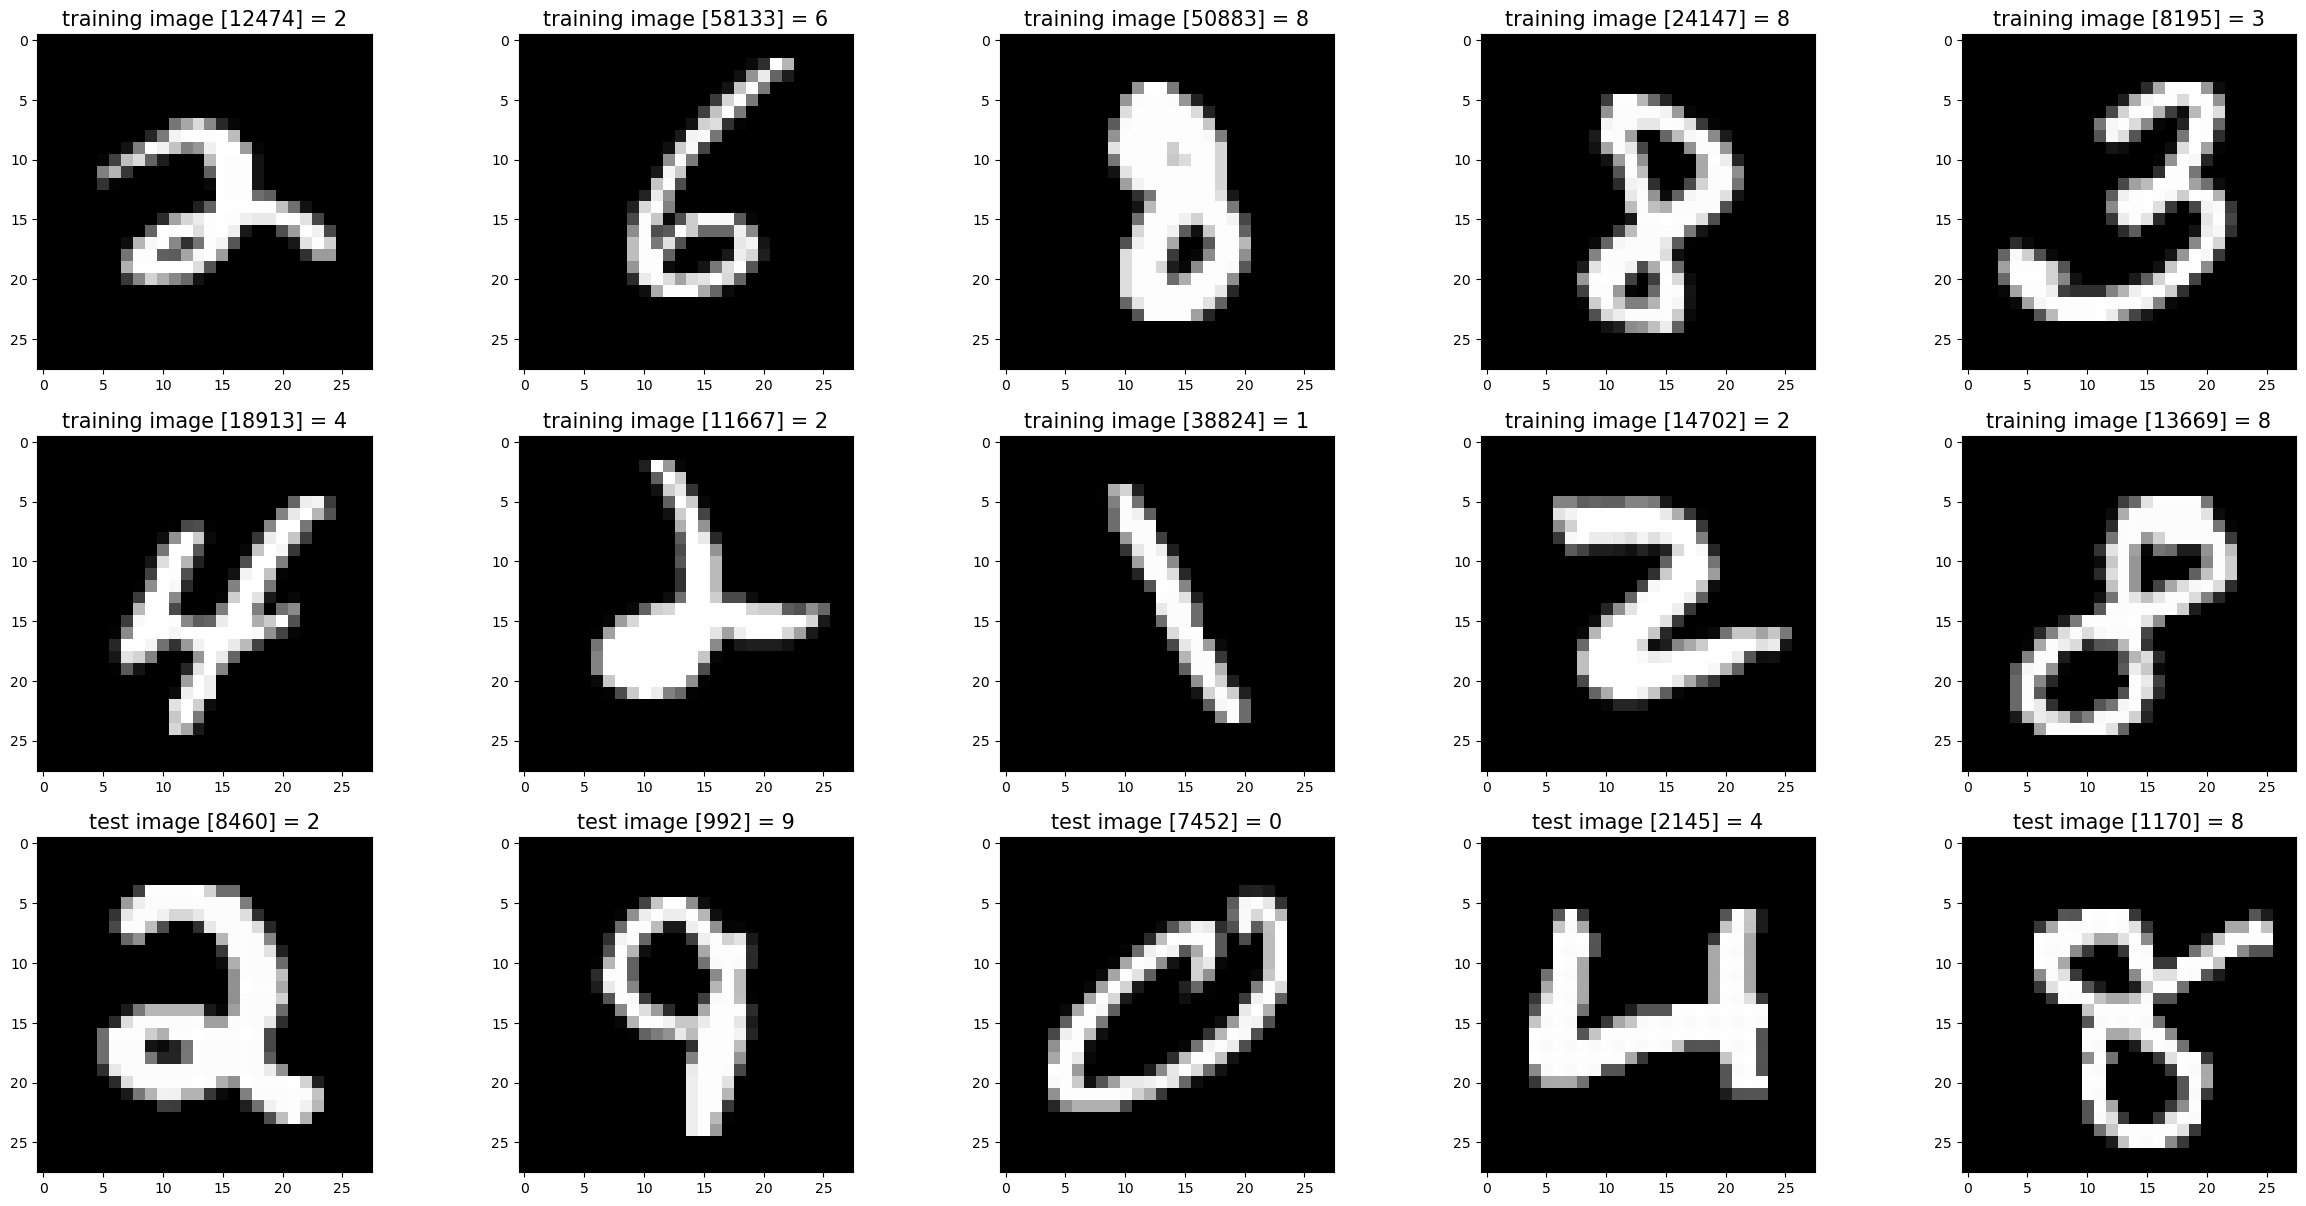

In [3]:
# Show some random training and test images 
images_2_show = []
titles_2_show = []
for i in range(0, 10):
    r = random.randint(1, 60000)
    images_2_show.append(x_train[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))    

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_2_show.append(x_test[r])        
    titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))    

show_images(images_2_show, titles_2_show)

### Preprocessing the data

In [4]:
# Flattening the 28x28 images.
x_train_flat = x_train.reshape(x_train.shape[0], -1).T
x_test_flat = x_test.reshape(x_test.shape[0], -1).T

# Save original labels before one-hot encoding.
x_train_original = x_train.copy()
x_test_original = x_test.copy()
y_train_original = y_train.copy()
y_test_original = y_test.copy()

# One-hot encoding of labels.
y_train = to_one_hot(y_train.reshape(1, y_train.shape[0]), 10)
y_test = to_one_hot(y_test.reshape(1, y_test.shape[0]), 10)

# Normalize pixel values to [0, 1].
x_train = x_train_flat / 255.0
x_test = x_test_flat / 255.0

print("x_train shape: " + str(x_train.shape))
print("x_test shape: " + str(x_test.shape))
print("y_train shape: " + str(y_train.shape))
print("y_test shape: " + str(y_test.shape))

x_train shape: (784, 60000)
x_test shape: (784, 10000)
y_train shape: (10, 60000)
y_test shape: (10, 10000)


### Setting hyperparameters

In [7]:
layers_dims = [x_train.shape[0], 128, 64, 10] # 4-layer model
learning_rate = 0.001
minibatch_size = 128
num_epochs = 1000

### Training the model

In [8]:
parameters, costs = L_layer_model(
    x_train, y_train,
    layers_dims=layers_dims,
    learning_rate=learning_rate,
    num_epochs=num_epochs,
    mini_batch_size=minibatch_size,
    print_cost=True)

Cost after epoch 0: 0.3320692188438505
Cost after epoch 50: 1.5818008178629303e-05
Cost after epoch 100: 2.6199596515039e-06
Cost after epoch 150: 1.3813527534194643e-06
Cost after epoch 200: 8.918827366074275e-07
Cost after epoch 250: 2.2080234543839542e-10
Cost after epoch 300: 3.751610894821598e-11
Cost after epoch 350: 2.0821870430052392e-11
Cost after epoch 400: 1.4592721070711217e-11
Cost after epoch 450: 1.1322282432934515e-11
Cost after epoch 500: 9.305310676389825e-12
Cost after epoch 550: 7.943253358079034e-12
Cost after epoch 600: 6.9610113815840055e-12
Cost after epoch 650: 6.219837722003892e-12
Cost after epoch 700: 5.639477797546501e-12
Cost after epoch 750: 5.174411456873368e-12
Cost after epoch 800: 4.78871405197021e-12
Cost after epoch 850: 4.466661633129231e-12
Cost after epoch 900: 4.1967046198044446e-12
Cost after epoch 950: 3.96353713743093e-12
Cost after epoch 999: 3.768860438074043e-12


### Cost over time

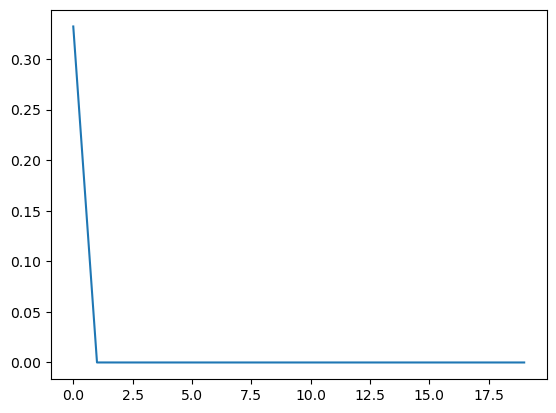

In [9]:
plt.plot(costs)

### Prediction accuracy

For the training set, we have an accuracy of 100%

In [10]:
predict(x_train, y_train, parameters) # TODO: use one-hot encoded y_train

Accuracy: 1.0


array([5, 0, 4, ..., 5, 6, 8], shape=(60000,))

For the test set, we have an accuracy of 98%

In [11]:
predict(x_test, y_test, parameters)

Accuracy: 0.9822


array([7, 2, 1, ..., 4, 5, 6], shape=(10000,))

In [12]:
show_wrongly_classified(x_test, y_test, parameters)

Found 178 wrongly classified items.
Index: 149, True label: 2, Predicted: 3
Index: 217, True label: 6, Predicted: 5
Index: 247, True label: 4, Predicted: 2
Index: 340, True label: 5, Predicted: 3
Index: 381, True label: 3, Predicted: 7


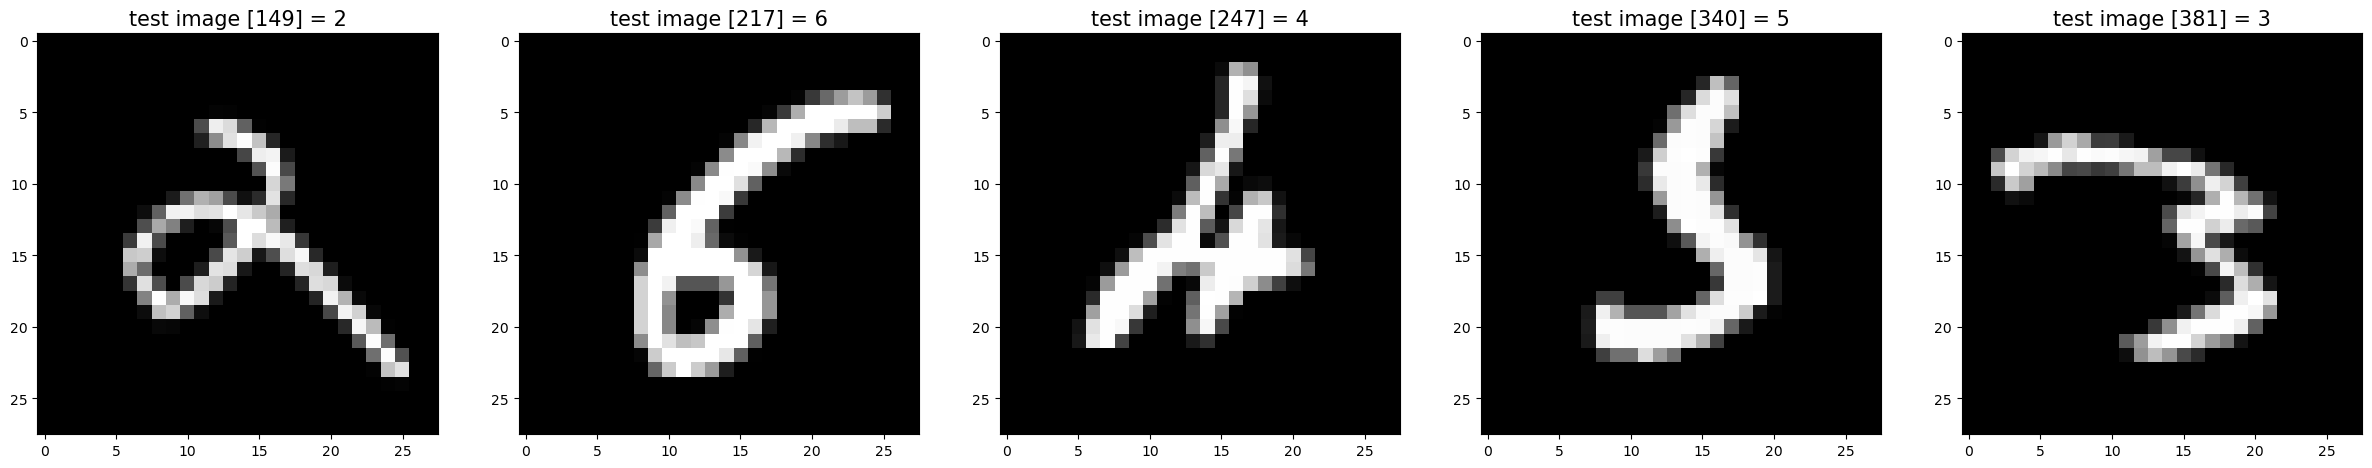

In [13]:
# Show some random training and test images 
images_2_show = []
titles_2_show = []
for i in [149, 217, 247, 340, 381]:
    images_2_show.append(x_test_original[i])
    titles_2_show.append('test image [' + str(i) + '] = ' + str(y_test_original[i]))

show_images(images_2_show, titles_2_show)